In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
dataset = pd.read_csv('4dof_valid_results.csv')
dataset = dataset.drop(columns='Unnamed: 0')
dataset.rename(columns = {'Arm ID':'Arm_ID'}, inplace = True)

In [80]:
'''Group by Manipulator Configuration
        Success_Rates - how many clusters the arm reached, normalized to 0-1.
        Min_Manipulability - the minimum manipulability value among 10 clusters
        Max_Manipulability - the maximum manipulability value among 10 clusters
        Manipulability_Rates - the avarage of the manipulability index
        MaxSum_Mid_joint_proximity - the maximum sum of mid joint matrix
'''
grouped_4dof = dataset.groupby(['Arm_ID']).agg(
    Success_Rates=pd.NamedAgg(column="Success", aggfunc='mean'),
    Min_Manipulability=pd.NamedAgg(column='Manipulability - mu', aggfunc='min'),
    Max_Manipulability=pd.NamedAgg(column='Manipulability - mu', aggfunc='max'),
    Manipulability_Rates=pd.NamedAgg(column='Manipulability - mu', aggfunc='mean'),
    MaxSum_Mid_joint_proximity=pd.NamedAgg(column='Sum Mid joint proximity- all joints', aggfunc='max')).reset_index()


grouped_4dof

,Arm_ID,Success_Rates,Min_Manipulability,Max_Manipulability,Manipulability_Rates,MaxSum_Mid_joint_proximity
0,_roll_z_0_1_pitch_y_0_1_pitch_x_0_5_pitch_x_0_7,0.1,0.049,0.049,0.049,0.13
1,_roll_z_0_1_pitch_y_0_1_pitch_x_0_5_pitch_y_0_7,0.0,NaN,NaN,NaN,NaN
2,_roll_z_0_1_pitch_y_0_1_pitch_x_0_5_pitch_z_0_7,0.0,NaN,NaN,NaN,NaN
3,_roll_z_0_1_pitch_y_0_1_pitch_x_0_5_pris_x_0_7,0.0,NaN,NaN,NaN,NaN
4,_roll_z_0_1_pitch_y_0_1_pitch_x_0_5_pris_y_0_7,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4924,_roll_z_0_1_roll_y_0_7_roll_y_0_7_pris_z_0_3,0.0,NaN,NaN,NaN,NaN
4925,_roll_z_0_1_roll_y_0_7_roll_y_0_7_pris_z_0_5,0.0,NaN,NaN,NaN,NaN
4926,_roll_z_0_1_roll_y_0_7_roll_y_0_7_roll_y_0_1,0.0,NaN,NaN,NaN,NaN
4927,_roll_z_0_1_roll_y_0_7_roll_y_0_7_roll_y_0_3,0.0,NaN,NaN,NaN,NaN


In [81]:
''' split arm name to features '''
# new data frame with split value columns
new = grouped_4dof["Arm_ID"].str.split("_", expand=True)

grouped_4dof["Joint1 type"] = new[1]
grouped_4dof["Joint1 axis"] = new[2]
grouped_4dof["Link1 length"] = new[3] + "." + new[4]

grouped_4dof["Joint2 type"] = new[5]
grouped_4dof["Joint2 axis"] = new[6]
grouped_4dof["Link2 length"] = new[7] + "." + new[8]

grouped_4dof["Joint3 type"] = new[9]
grouped_4dof["Joint3 axis"] = new[10]
grouped_4dof["Link3 length"] = new[11] + "." + new[12]

grouped_4dof["Joint4 type"] = new[13]
grouped_4dof["Joint4 axis"] = new[14]
grouped_4dof["Link4 length"] = new[15] + "." + new[16]

# grouped_4dof = grouped_4dof.drop(['Arm_ID'], axis=1)


grouped_4dof

,Arm_ID,Success_Rates,Min_Manipulability,Max_Manipulability,Manipulability_Rates,MaxSum_Mid_joint_proximity,Joint1 type,Joint1 axis,Link1 length,Joint2 type,Joint2 axis,Link2 length,Joint3 type,Joint3 axis,Link3 length,Joint4 type,Joint4 axis,Link4 length
0,_roll_z_0_1_pitch_y_0_1_pitch_x_0_5_pitch_x_0_7,0.1,0.049,0.049,0.049,0.13,roll,z,0.1,pitch,y,0.1,pitch,x,0.5,pitch,x,0.7
1,_roll_z_0_1_pitch_y_0_1_pitch_x_0_5_pitch_y_0_7,0.0,NaN,NaN,NaN,NaN,roll,z,0.1,pitch,y,0.1,pitch,x,0.5,pitch,y,0.7
2,_roll_z_0_1_pitch_y_0_1_pitch_x_0_5_pitch_z_0_7,0.0,NaN,NaN,NaN,NaN,roll,z,0.1,pitch,y,0.1,pitch,x,0.5,pitch,z,0.7
3,_roll_z_0_1_pitch_y_0_1_pitch_x_0_5_pris_x_0_7,0.0,NaN,NaN,NaN,NaN,roll,z,0.1,pitch,y,0.1,pitch,x,0.5,pris,x,0.7
4,_roll_z_0_1_pitch_y_0_1_pitch_x_0_5_pris_y_0_7,0.0,NaN,NaN,NaN,NaN,roll,z,0.1,pitch,y,0.1,pitch,x,0.5,pris,y,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4924,_roll_z_0_1_roll_y_0_7_roll_y_0_7_pris_z_0_3,0.0,NaN,NaN,NaN,NaN,roll,z,0.1,roll,y,0.7,roll,y,0.7,pris,z,0.3
4925,_roll_z_0_1_roll_y_0_7_roll_y_0_7_pris_z_0_5,0.0,NaN,NaN,NaN,NaN,roll,z,0.1,roll,y,0.7,roll,y,0.7,pris,z,0.5
4926,_roll_z_0_1_roll_y_0_7_roll_y_0_7_roll_y_0_1,0.0,NaN,NaN,NaN,NaN,roll,z,0.1,roll,y,0.7,roll,y,0.7,roll,y,0.1
4927,_roll_z_0_1_roll_y_0_7_roll_y_0_7_roll_y_0_3,0.0,NaN,NaN,NaN,NaN,roll,z,0.1,roll,y,0.7,roll,y,0.7,roll,y,0.3


In [82]:
'''Indexing Link Configuration and Joint Confuguration'''
grouped_4dof['Joint Configuration Index'] = grouped_4dof.groupby(['Joint1 type','Joint1 axis', 'Joint2 type', 'Joint2 axis',
                                                      'Joint3 type', 'Joint3 axis', 'Joint4 type',
                                                      'Joint4 axis']).ngroup()


grouped_4dof['Link Configuration Index'] = grouped_4dof.groupby(['Link1 length', 'Link2 length', 'Link3 length', 'Link4 length']).ngroup()

grouped_4dof

,Arm_ID,Success_Rates,Min_Manipulability,Max_Manipulability,Manipulability_Rates,MaxSum_Mid_joint_proximity,Joint1 type,Joint1 axis,Link1 length,Joint2 type,Joint2 axis,Link2 length,Joint3 type,Joint3 axis,Link3 length,Joint4 type,Joint4 axis,Link4 length,Joint Configuration Index,Link Configuration Index
0,_roll_z_0_1_pitch_y_0_1_pitch_x_0_5_pitch_x_0_7,0.1,0.049,0.049,0.049,0.13,roll,z,0.1,pitch,y,0.1,pitch,x,0.5,pitch,x,0.7,0,0
1,_roll_z_0_1_pitch_y_0_1_pitch_x_0_5_pitch_y_0_7,0.0,NaN,NaN,NaN,NaN,roll,z,0.1,pitch,y,0.1,pitch,x,0.5,pitch,y,0.7,1,0
2,_roll_z_0_1_pitch_y_0_1_pitch_x_0_5_pitch_z_0_7,0.0,NaN,NaN,NaN,NaN,roll,z,0.1,pitch,y,0.1,pitch,x,0.5,pitch,z,0.7,2,0
3,_roll_z_0_1_pitch_y_0_1_pitch_x_0_5_pris_x_0_7,0.0,NaN,NaN,NaN,NaN,roll,z,0.1,pitch,y,0.1,pitch,x,0.5,pris,x,0.7,3,0
4,_roll_z_0_1_pitch_y_0_1_pitch_x_0_5_pris_y_0_7,0.0,NaN,NaN,NaN,NaN,roll,z,0.1,pitch,y,0.1,pitch,x,0.5,pris,y,0.7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4924,_roll_z_0_1_roll_y_0_7_roll_y_0_7_pris_z_0_3,0.0,NaN,NaN,NaN,NaN,roll,z,0.1,roll,y,0.7,roll,y,0.7,pris,z,0.3,157,29
4925,_roll_z_0_1_roll_y_0_7_roll_y_0_7_pris_z_0_5,0.0,NaN,NaN,NaN,NaN,roll,z,0.1,roll,y,0.7,roll,y,0.7,pris,z,0.5,157,30
4926,_roll_z_0_1_roll_y_0_7_roll_y_0_7_roll_y_0_1,0.0,NaN,NaN,NaN,NaN,roll,z,0.1,roll,y,0.7,roll,y,0.7,roll,y,0.1,158,28
4927,_roll_z_0_1_roll_y_0_7_roll_y_0_7_roll_y_0_3,0.0,NaN,NaN,NaN,NaN,roll,z,0.1,roll,y,0.7,roll,y,0.7,roll,y,0.3,158,29


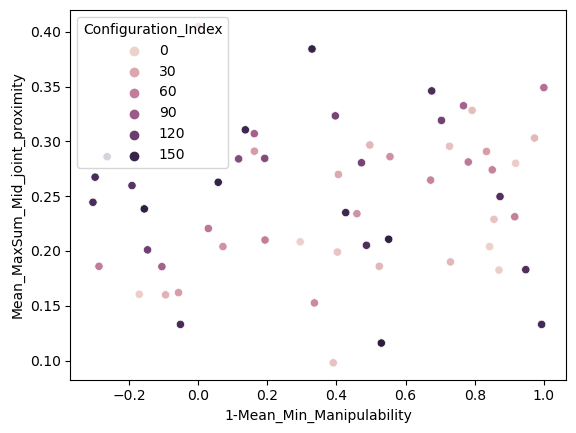

,Joint1 type,Joint1 axis,Joint2 type,Joint2 axis,Joint3 type,Joint3 axis,Joint4 type,Joint4 axis,Configuration_Index,Mean_Min_Manipulability,Mean_MaxSum_Mid_joint_proximity,1-Mean_Min_Manipulability
0,roll,z,pitch,y,pitch,x,pitch,x,0.0,0.157000,0.204000,0.843000
1,roll,z,pitch,y,pitch,x,pitch,y,1.0,0.704615,0.208308,0.295385
2,roll,z,pitch,y,pitch,x,pitch,z,2.0,0.129750,0.182583,0.870250
3,roll,z,pitch,y,pitch,x,pris,x,3.0,1.170000,0.160500,-0.170000
4,roll,z,pitch,y,pitch,x,pris,y,4.0,0.081667,0.280000,0.918333
...,...,...,...,...,...,...,...,...,...,...,...,...
154,roll,z,roll,y,pris,z,roll,y,154.0,NaN,NaN,NaN
155,roll,z,roll,y,roll,y,pitch,y,155.0,0.448767,0.210700,0.551233
156,roll,z,roll,y,roll,y,pris,y,156.0,1.155474,0.238368,-0.155474
157,roll,z,roll,y,roll,y,pris,z,157.0,NaN,NaN,NaN


In [83]:
'''Group by Joints Configurations
    Mean_Min_Manipulability - avarage of minimum manipulability
    MaxSum_Mid_joint_proximity - avarage of maximum sum of mid joint matrix
'''
grouped_4dof_joint_conf = grouped_4dof.groupby(['Joint1 type',
                                                      'Joint1 axis', 'Joint2 type', 'Joint2 axis',
                                                      'Joint3 type', 'Joint3 axis', 'Joint4 type',
                                                      'Joint4 axis']).agg(
    Configuration_Index=pd.NamedAgg(column='Joint Configuration Index', aggfunc='mean'),
    Mean_Min_Manipulability=pd.NamedAgg(column='Min_Manipulability', aggfunc='mean'),
    Mean_MaxSum_Mid_joint_proximity=pd.NamedAgg(column='MaxSum_Mid_joint_proximity', aggfunc='mean')).reset_index()

# grouped_4dof_joint_conf['Configuration Index'] = grouped_4dof_joint_conf.groupby(['Joint1 type',
#                                                       'Joint1 axis', 'Joint2 type', 'Joint2 axis',
#                                                       'Joint3 type', 'Joint3 axis', 'Joint4 type',
#                                                       'Joint4 axis']).ngroup()

grouped_4dof_joint_conf['1-Mean_Min_Manipulability'] = 1 - grouped_4dof_joint_conf['Mean_Min_Manipulability']
x = grouped_4dof_joint_conf['1-Mean_Min_Manipulability']
y = grouped_4dof_joint_conf['Mean_MaxSum_Mid_joint_proximity']
h = grouped_4dof_joint_conf['Configuration_Index']

sns.scatterplot(x=x, y=y, hue=h)
plt.show()

grouped_4dof_joint_conf

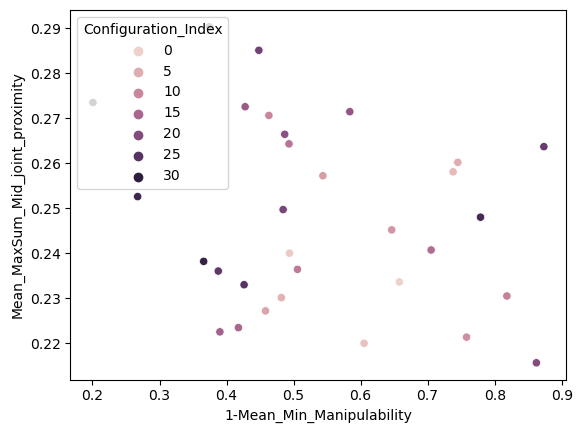

,Link1 length,Link2 length,Link3 length,Link4 length,Configuration_Index,Mean_Min_Manipulability,Mean_MaxSum_Mid_joint_proximity,1-Mean_Min_Manipulability
0,0.1,0.1,0.5,0.7,0.0,0.342250,0.233625,0.657750
1,0.1,0.1,0.7,0.5,1.0,0.506150,0.240000,0.493850
2,0.1,0.1,0.7,0.7,2.0,0.394818,0.220000,0.605182
3,0.1,0.3,0.3,0.7,3.0,0.262083,0.258083,0.737917
4,0.1,0.3,0.5,0.5,4.0,0.518227,0.230136,0.481773
5,0.1,0.3,0.5,0.7,5.0,0.255000,0.260182,0.745000
6,0.1,0.3,0.7,0.3,6.0,0.541846,0.227192,0.458154
7,0.1,0.3,0.7,0.5,7.0,0.456300,0.257200,0.543700
8,0.1,0.3,0.7,0.7,8.0,0.353636,0.245182,0.646364
9,0.1,0.5,0.1,0.7,9.0,0.242000,0.221364,0.758000


In [84]:
'''Group by Joints Configurations
    Mean_Min_Manipulability - avarage of minimum manipulability
    MaxSum_Mid_joint_proximity - avarage of maximum sum of mid joint matrix
'''
grouped_4dof_links_conf = grouped_4dof.groupby(['Link1 length', 'Link2 length', 'Link3 length', 'Link4 length']).agg(
    Configuration_Index=pd.NamedAgg(column='Link Configuration Index', aggfunc='mean'),
    Mean_Min_Manipulability=pd.NamedAgg(column='Min_Manipulability', aggfunc='mean'),
    Mean_MaxSum_Mid_joint_proximity=pd.NamedAgg(column='MaxSum_Mid_joint_proximity', aggfunc='mean')).reset_index()

# grouped_4dof_links_conf['Configuration Index'] = grouped_4dof_links_conf.groupby(['Link1 length', 'Link2 length', 'Link3 length', 'Link4 length']).ngroup()

grouped_4dof_links_conf['1-Mean_Min_Manipulability'] = 1 - grouped_4dof_links_conf['Mean_Min_Manipulability']
x = grouped_4dof_links_conf['1-Mean_Min_Manipulability']
y = grouped_4dof_links_conf['Mean_MaxSum_Mid_joint_proximity']
h = grouped_4dof_links_conf['Configuration_Index']

sns.scatterplot(x=x, y=y, hue=h)
plt.show()

grouped_4dof_links_conf

In [85]:
'''Find the best Manipulator configurations'''
# best_grouped_4dof = dataset.groupby(['Arm_ID'])['Success'].sum().astype(float).reset_index()

# best_grouped_4dof

'Find the best Manipulator configurations'

In [91]:
'''All sucssesful manipulators - Reached 10 Clusters'''
# grouped_4dof = dataset.groupby(['Arm_ID'])['Success'].sum().astype(float).reset_index()

good_arms = grouped_4dof.loc[grouped_4dof['Success_Rates'] > 0.9]
good_arms_list = good_arms['Arm_ID'].values.tolist()
good_arms_data = grouped_4dof.query('Arm_ID in @good_arms_list').reset_index(drop=True)

good_arms_data
# good_arms_data.to_csv('/home/ar1/PycharmProjects/Roni_Master/best_4dof_arms.csv')


,Arm_ID,Success_Rates,Min_Manipulability,Max_Manipulability,Manipulability_Rates,MaxSum_Mid_joint_proximity,Joint1 type,Joint1 axis,Link1 length,Joint2 type,Joint2 axis,Link2 length,Joint3 type,Joint3 axis,Link3 length,Joint4 type,Joint4 axis,Link4 length,Joint Configuration Index,Link Configuration Index
0,_roll_z_0_1_pitch_y_0_1_pris_x_0_7_pitch_y_0_5,1.0,0.623,1.156,0.9428,0.243,roll,z,0.1,pitch,y,0.1,pris,x,0.7,pitch,y,0.5,28,1
1,_roll_z_0_1_pitch_y_0_1_pris_x_0_7_pitch_y_0_7,1.0,0.605,1.213,0.9566,0.372,roll,z,0.1,pitch,y,0.1,pris,x,0.7,pitch,y,0.7,28,2
2,_roll_z_0_1_pitch_y_0_1_pris_z_0_7_pitch_y_0_5,1.0,0.349,1.037,0.7752,0.274,roll,z,0.1,pitch,y,0.1,pris,z,0.7,pitch,y,0.5,44,1
3,_roll_z_0_1_pitch_y_0_1_pris_z_0_7_pitch_y_0_7,1.0,0.360,1.194,0.8088,0.257,roll,z,0.1,pitch,y,0.1,pris,z,0.7,pitch,y,0.7,44,2
4,_roll_z_0_1_pris_y_0_3_pitch_x_0_7_pitch_y_0_3,1.0,0.419,0.632,0.5714,0.242,roll,z,0.1,pris,y,0.3,pitch,x,0.7,pitch,y,0.3,64,6
5,_roll_z_0_1_pris_y_0_3_pitch_x_0_7_pitch_y_0_5,1.0,0.419,0.612,0.5243,0.252,roll,z,0.1,pris,y,0.3,pitch,x,0.7,pitch,y,0.5,64,7
6,_roll_z_0_1_pris_y_0_5_pitch_x_0_5_pitch_y_0_3,1.0,0.288,0.434,0.3604,0.189,roll,z,0.1,pris,y,0.5,pitch,x,0.5,pitch,y,0.3,64,12
7,_roll_z_0_1_pris_y_0_5_pitch_x_0_7_pitch_y_0_1,1.0,0.296,0.586,0.4707,0.213,roll,z,0.1,pris,y,0.5,pitch,x,0.7,pitch,y,0.1,64,15
8,_roll_z_0_1_pris_y_0_5_pitch_x_0_7_pitch_y_0_3,1.0,0.357,0.561,0.4965,0.234,roll,z,0.1,pris,y,0.5,pitch,x,0.7,pitch,y,0.3,64,16
9,_roll_z_0_1_pris_y_0_5_pitch_x_0_7_pitch_y_0_5,1.0,0.367,0.538,0.4720,0.266,roll,z,0.1,pris,y,0.5,pitch,x,0.7,pitch,y,0.5,64,17


In [92]:
'''split arm name to features'''  
# new data frame with split value columns
new = good_arms_data["Arm_ID"].str.split("_", expand=True)

good_arms_data["Joint1 type"] = new[1]
good_arms_data["Joint1 axis"] = new[2]
good_arms_data["Link1 length"] = new[3] + "." + new[4]

good_arms_data["Joint2 type"] = new[5]
good_arms_data["Joint2 axis"] = new[6]
good_arms_data["Link2 length"] = new[7] + "." + new[8]

good_arms_data["Joint3 type"] = new[9]
good_arms_data["Joint3 axis"] = new[10]
good_arms_data["Link3 length"] = new[11] + "." + new[12]

good_arms_data["Joint4 type"] = new[13]
good_arms_data["Joint4 axis"] = new[14]
good_arms_data["Link4 length"] = new[15] + "." + new[16]

good_arms_data


,Arm_ID,Success_Rates,Min_Manipulability,Max_Manipulability,Manipulability_Rates,MaxSum_Mid_joint_proximity,Joint1 type,Joint1 axis,Link1 length,Joint2 type,Joint2 axis,Link2 length,Joint3 type,Joint3 axis,Link3 length,Joint4 type,Joint4 axis,Link4 length,Joint Configuration Index,Link Configuration Index
0,_roll_z_0_1_pitch_y_0_1_pris_x_0_7_pitch_y_0_5,1.0,0.623,1.156,0.9428,0.243,roll,z,0.1,pitch,y,0.1,pris,x,0.7,pitch,y,0.5,28,1
1,_roll_z_0_1_pitch_y_0_1_pris_x_0_7_pitch_y_0_7,1.0,0.605,1.213,0.9566,0.372,roll,z,0.1,pitch,y,0.1,pris,x,0.7,pitch,y,0.7,28,2
2,_roll_z_0_1_pitch_y_0_1_pris_z_0_7_pitch_y_0_5,1.0,0.349,1.037,0.7752,0.274,roll,z,0.1,pitch,y,0.1,pris,z,0.7,pitch,y,0.5,44,1
3,_roll_z_0_1_pitch_y_0_1_pris_z_0_7_pitch_y_0_7,1.0,0.360,1.194,0.8088,0.257,roll,z,0.1,pitch,y,0.1,pris,z,0.7,pitch,y,0.7,44,2
4,_roll_z_0_1_pris_y_0_3_pitch_x_0_7_pitch_y_0_3,1.0,0.419,0.632,0.5714,0.242,roll,z,0.1,pris,y,0.3,pitch,x,0.7,pitch,y,0.3,64,6
5,_roll_z_0_1_pris_y_0_3_pitch_x_0_7_pitch_y_0_5,1.0,0.419,0.612,0.5243,0.252,roll,z,0.1,pris,y,0.3,pitch,x,0.7,pitch,y,0.5,64,7
6,_roll_z_0_1_pris_y_0_5_pitch_x_0_5_pitch_y_0_3,1.0,0.288,0.434,0.3604,0.189,roll,z,0.1,pris,y,0.5,pitch,x,0.5,pitch,y,0.3,64,12
7,_roll_z_0_1_pris_y_0_5_pitch_x_0_7_pitch_y_0_1,1.0,0.296,0.586,0.4707,0.213,roll,z,0.1,pris,y,0.5,pitch,x,0.7,pitch,y,0.1,64,15
8,_roll_z_0_1_pris_y_0_5_pitch_x_0_7_pitch_y_0_3,1.0,0.357,0.561,0.4965,0.234,roll,z,0.1,pris,y,0.5,pitch,x,0.7,pitch,y,0.3,64,16
9,_roll_z_0_1_pris_y_0_5_pitch_x_0_7_pitch_y_0_5,1.0,0.367,0.538,0.4720,0.266,roll,z,0.1,pris,y,0.5,pitch,x,0.7,pitch,y,0.5,64,17


In [102]:
'''Group by Manipulator Configuration
        Success_Rates - how many clusters the arm reached, normalized to 0-1.
        Min_Manipulability - the minimum manipulability value among 10 clusters
        Max_Manipulability - the maximum manipulability value among 10 clusters
        Manipulability_Rates - the avarage of the manipulability index
        MaxSum_Mid_joint_proximity - the maximum sum of mid joint matrix
'''
grouped_good_arms_data = good_arms_data.groupby(['Joint1 type',
                                                      'Joint1 axis', 'Joint2 type', 'Joint2 axis',
                                                      'Joint3 type', 'Joint3 axis', 'Joint4 type',
                                                      'Joint4 axis','Link1 length', 'Link2 length', 'Link3 length', 'Link4 length']).agg(
    Joint_Configuration_Index=pd.NamedAgg(column='Joint Configuration Index', aggfunc='mean'),
    Link_Configuration_Index=pd.NamedAgg(column='Link Configuration Index', aggfunc='mean'),
    Success_Rates=pd.NamedAgg(column="Success_Rates", aggfunc='mean'),
    Mean_Min_Manipulability=pd.NamedAgg(column='Min_Manipulability', aggfunc='mean'),
    Mean_Max_Manipulability=pd.NamedAgg(column='Max_Manipulability', aggfunc='mean'),
    Mean_Manipulability_Rates=pd.NamedAgg(column='Manipulability_Rates', aggfunc='mean'),
    Mean_MaxSum_Mid_joint_proximity=pd.NamedAgg(column='MaxSum_Mid_joint_proximity', aggfunc='mean')).reset_index()


grouped_good_arms_data

,Joint1 type,Joint1 axis,Joint2 type,Joint2 axis,Joint3 type,Joint3 axis,Joint4 type,Joint4 axis,Link1 length,Link2 length,Link3 length,Link4 length,Joint_Configuration_Index,Link_Configuration_Index,Success_Rates,Mean_Min_Manipulability,Mean_Max_Manipulability,Mean_Manipulability_Rates,Mean_MaxSum_Mid_joint_proximity
0,roll,z,pitch,y,pris,x,pitch,y,0.1,0.1,0.7,0.5,28.0,1.0,1.0,0.623,1.156,0.9428,0.243
1,roll,z,pitch,y,pris,x,pitch,y,0.1,0.1,0.7,0.7,28.0,2.0,1.0,0.605,1.213,0.9566,0.372
2,roll,z,pitch,y,pris,z,pitch,y,0.1,0.1,0.7,0.5,44.0,1.0,1.0,0.349,1.037,0.7752,0.274
3,roll,z,pitch,y,pris,z,pitch,y,0.1,0.1,0.7,0.7,44.0,2.0,1.0,0.360,1.194,0.8088,0.257
4,roll,z,pris,y,pitch,x,pitch,y,0.1,0.3,0.7,0.3,64.0,6.0,1.0,0.419,0.632,0.5714,0.242
5,roll,z,pris,y,pitch,x,pitch,y,0.1,0.3,0.7,0.5,64.0,7.0,1.0,0.419,0.612,0.5243,0.252
6,roll,z,pris,y,pitch,x,pitch,y,0.1,0.5,0.5,0.3,64.0,12.0,1.0,0.288,0.434,0.3604,0.189
7,roll,z,pris,y,pitch,x,pitch,y,0.1,0.5,0.7,0.1,64.0,15.0,1.0,0.296,0.586,0.4707,0.213
8,roll,z,pris,y,pitch,x,pitch,y,0.1,0.5,0.7,0.3,64.0,16.0,1.0,0.357,0.561,0.4965,0.234
9,roll,z,pris,y,pitch,x,pitch,y,0.1,0.5,0.7,0.5,64.0,17.0,1.0,0.367,0.538,0.4720,0.266


In [97]:
grouped_good_arms_data.std()

/tmp/ipykernel_31285/3079822732.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  grouped_good_arms_data.std()


Joint_Configuration_Index          40.170900
Link_Configuration_Index            9.844741
Mean_Success_Rates                  0.000000
Mean_Min_Manipulability             0.218246
Mean_Max_Manipulability             0.281834
Mean_Manipulability_Rates           0.239883
Mean_MaxSum_Mid_joint_proximity     0.051926
dtype: float64

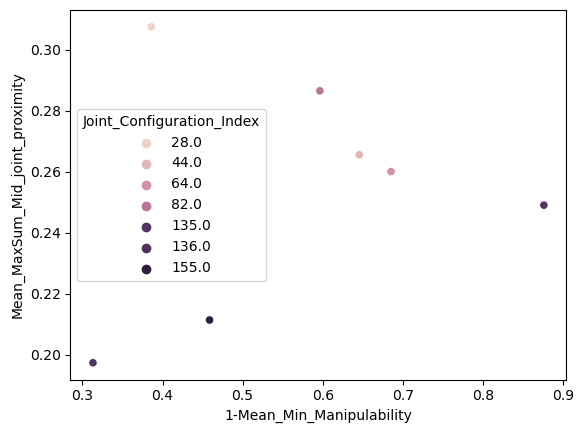

,Joint1 type,Joint1 axis,Joint2 type,Joint2 axis,Joint3 type,Joint3 axis,Joint4 type,Joint4 axis,Joint_Configuration_Index,Count,Mean_Min_Manipulability,Mean_MaxSum_Mid_joint_proximity,1-Mean_Min_Manipulability
0,roll,z,pitch,y,pris,x,pitch,y,28.0,2,0.614000,0.307500,0.386000
1,roll,z,pitch,y,pris,z,pitch,y,44.0,2,0.354500,0.265500,0.645500
2,roll,z,pris,y,pitch,x,pitch,y,64.0,11,0.314818,0.260000,0.685182
3,roll,z,pris,y,pitch,z,pitch,y,82.0,6,0.403667,0.286500,0.596333
4,roll,z,roll,y,pitch,y,pitch,x,135.0,3,0.124000,0.249000,0.876000
5,roll,z,roll,y,pitch,y,pitch,y,136.0,10,0.686900,0.197300,0.313100
6,roll,z,roll,y,roll,y,pitch,y,155.0,3,0.541333,0.211333,0.458667


In [108]:
'''Sucssesful manipulators - Split to joints configuration'''
# grouped_best4dof_data = grouped_good_arms_data.drop(['Arm_ID'], axis=1)
# print("Columns Order", grouped_best4dof_data.columns)

best_4dof_joint_conf = good_arms_data.groupby(['Joint1 type',
                                                      'Joint1 axis', 'Joint2 type', 'Joint2 axis',
                                                      'Joint3 type', 'Joint3 axis', 'Joint4 type',
                                                      'Joint4 axis']).agg(
    Joint_Configuration_Index = pd.NamedAgg(column='Joint Configuration Index', aggfunc='mean'),
    Count = pd.NamedAgg(column='Arm_ID', aggfunc='count'),
    Mean_Min_Manipulability=pd.NamedAgg(column='Min_Manipulability', aggfunc='mean'),
    Mean_MaxSum_Mid_joint_proximity=pd.NamedAgg(column='MaxSum_Mid_joint_proximity', aggfunc='mean')).reset_index()

# best_4dof_joint_conf['Configuration Index'] = best_4dof_joint_conf.groupby(['Joint1 type',
#                                                       'Joint1 axis', 'Joint2 type', 'Joint2 axis',
#                                                       'Joint3 type', 'Joint3 axis', 'Joint4 type',
#                                                       'Joint4 axis']).ngroup()

best_4dof_joint_conf['1-Mean_Min_Manipulability'] = 1 - best_4dof_joint_conf['Mean_Min_Manipulability']
x = best_4dof_joint_conf['1-Mean_Min_Manipulability']
y = best_4dof_joint_conf['Mean_MaxSum_Mid_joint_proximity']
h = best_4dof_joint_conf['Joint_Configuration_Index']

sns.scatterplot(x=x, y=y, hue=h, legend='full')
plt.show()

best_4dof_joint_conf


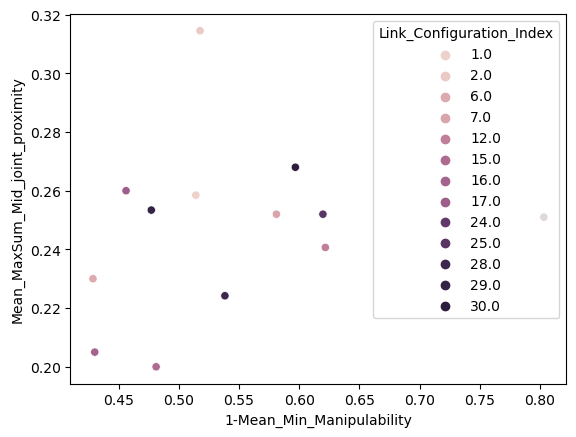

,Link1 length,Link2 length,Link3 length,Link4 length,Link_Configuration_Index,Count,Mean_Min_Manipulability,Mean_MaxSum_Mid_joint_proximity,1-Mean_Min_Manipulability
0,0.1,0.1,0.7,0.5,1.0,2,0.486000,0.258500,0.514000
1,0.1,0.1,0.7,0.7,2.0,2,0.482500,0.314500,0.517500
2,0.1,0.3,0.7,0.3,6.0,2,0.571500,0.230000,0.428500
3,0.1,0.3,0.7,0.5,7.0,1,0.419000,0.252000,0.581000
4,0.1,0.5,0.5,0.3,12.0,3,0.378333,0.240667,0.621667
5,0.1,0.5,0.7,0.1,15.0,3,0.519000,0.200000,0.481000
6,0.1,0.5,0.7,0.3,16.0,2,0.570000,0.205000,0.430000
7,0.1,0.5,0.7,0.5,17.0,2,0.544000,0.260000,0.456000
8,0.1,0.7,0.5,0.1,24.0,3,0.196667,0.251000,0.803333
9,0.1,0.7,0.5,0.3,25.0,3,0.380333,0.252000,0.619667


In [110]:
'''Sucssesful manipulators - Split to links configuration'''
best_4dof_link_conf = good_arms_data.groupby(['Link1 length', 'Link2 length', 'Link3 length', 'Link4 length']).agg(
    Link_Configuration_Index = pd.NamedAgg(column='Link Configuration Index', aggfunc='mean'),
    Count = pd.NamedAgg(column='Arm_ID', aggfunc='count'),
    Mean_Min_Manipulability=pd.NamedAgg(column='Min_Manipulability', aggfunc='mean'),
    Mean_MaxSum_Mid_joint_proximity=pd.NamedAgg(column='MaxSum_Mid_joint_proximity', aggfunc='mean')).reset_index()

# best_4dof_joint_conf['Configuration Index'] = best_4dof_joint_conf.groupby(['Joint1 type',
#                                                       'Joint1 axis', 'Joint2 type', 'Joint2 axis',
#                                                       'Joint3 type', 'Joint3 axis', 'Joint4 type',
#                                                       'Joint4 axis']).ngroup()

best_4dof_link_conf['1-Mean_Min_Manipulability'] = 1 - best_4dof_link_conf['Mean_Min_Manipulability']
x = best_4dof_link_conf['1-Mean_Min_Manipulability']
y = best_4dof_link_conf['Mean_MaxSum_Mid_joint_proximity']
h = best_4dof_link_conf['Link_Configuration_Index']

sns.scatterplot(x=x, y=y, hue=h, legend='full')
plt.show()

best_4dof_link_conf